In [ ]:
# アソシエーション分析
# 何らかの基準を用いて計算すれば結果を得ることができるが、結果が有用であるか、なぜそうなるかを判断しなければならない

In [1]:
# A -> B を判断する指標
# 期待信頼度(expected confidence) Bの起こる確率 p(B)
# 支持度(support) A,Bの共起確率 p(A, B)
# 信頼度(confidence) Aの下でBが起こる確率 p(B|A)
# リフト値(lift) AがBを起こしやすくしたか p(B|A) / p(B) = p(A, B) / (p(A) * p(B))
# リフト値が１より大きいことが１つの基準になる

In [1]:
library(arules)

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

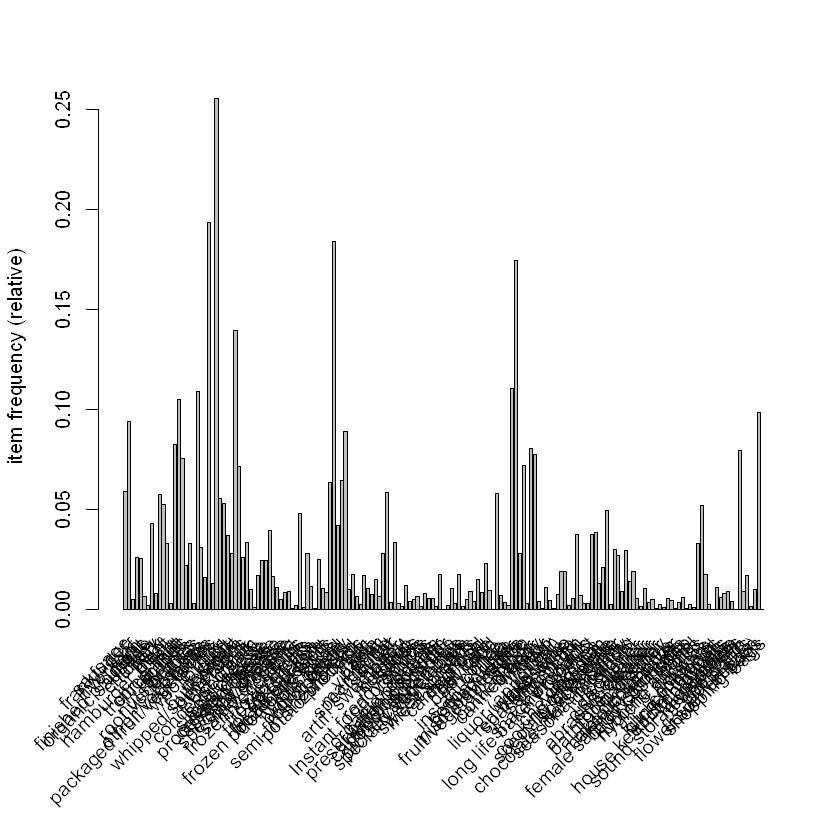

In [13]:
# あるスーパーマーケットで一か月に記録された9835件、169カテゴリ（55種の中分類と10種の大分類を持つ）の購買データ
# 各々のカテゴリの購入の有無がboolで記録されている
data(Groceries)
Groceries
itemFrequencyPlot(Groceries)

In [14]:
g = apriori(Groceries, p = list(support = 0.01, confidence = 0.5))
inspect(sort(g, by = "confidence"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                                      rhs                support   
[1]  {citrus fruit,root vegetables}        => {other vegetables} 0.01037112
[2]  {tropical fruit,root vegetables}      => {other vegetables} 0.01230300
[3]  {curd,yogurt}                         => {whole milk

In [15]:
apriori(Groceries, p = list(support = 0.005, confidence = 0.7), appearance = list(rhs = "whole milk", default = "lhs"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 1 rules 